In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the radius and discretization parameter
r = 1  # Assuming unit radius for the subnet sweep representation
xi = 0.1  # Discretization parameter (for illustration purposes)

# Defining the surface area (Here we use a circular area for example)
theta = np.linspace(0, 2 * np.pi, 100)
x_circle = r * np.cos(theta)
y_circle = r * np.sin(theta)

# Defining a source point (Assuming source at the center for this illustration)
source = (0, 0)

# Plotting the surface area (circle)
plt.figure(figsize=(6, 6))
plt.plot(x_circle, y_circle, linestyle='-', color='blue', label="Surface Boundary")

# Marking the source point
plt.scatter(*source, color='red', zorder=5, label="Source Point")

# Drawing the discretization parameter
# This will be represented as a small circle around the source point
disc_theta = np.linspace(0, 2 * np.pi, 30)
x_disc = xi * np.cos(disc_theta) + source[0]
y_disc = xi * np.sin(disc_theta) + source[1]
plt.plot(x_disc, y_disc, linestyle='--', color='green', label="Discretization Boundary (2xi)")

# Mark reachable points on the boundary (For simplicity, marking 4 points at cardinal directions).
points = [(r, 0), (0, r), (-r, 0), (0, -r)]
for point in points:
    plt.scatter(*point, color='black', zorder=5)

    # Connecting source to boundary points
    plt.plot([source[0], point[0]], [source[1], point[1]], 'k--', zorder=3)

# Setting labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Schematic Representation of a Sweeping Subnet')
plt.legend()

# Show plot with equal aspect ratio
plt.axis('equal')

# Show the plot
plt.show()

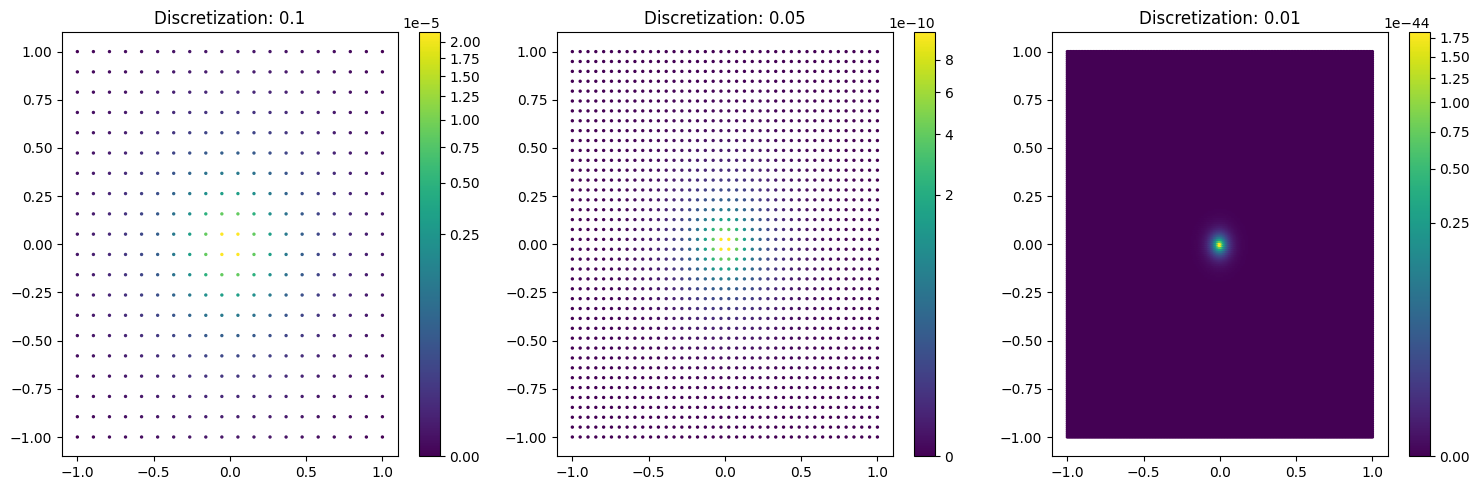

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm

# Function to simulate the causal barrier
def causal_barrier(t, xi):
    # Represents a simulation of barrier values in the 2D space
    # For simplicity, returning a placeholder array mimicking barrier values
    X, Y = np.meshgrid(np.linspace(-1, 1, int(2/xi)), np.linspace(-1, 1, int(2/xi)))
    Z = np.exp(-((X**2 + Y**2)**0.5 + t) / xi)  # Exponential decay as an example
    return X, Y, Z

# Define time variable and discretization parameters
t = 1  # Fixed point in time
discretization_params = [0.1, 0.05, 0.01]  # Varying discretization parameters

# Create figure
fig, axs = plt.subplots(1, len(discretization_params), figsize=(15, 5))

# Loop through varying discretization parameters and plot
for ax, xi in zip(axs, discretization_params):
    X, Y, Z = causal_barrier(t, xi)
    # Using scatter plot for performance and visualization of discretization points
    scatter = ax.scatter(X, Y, c=Z, cmap='viridis', norm=PowerNorm(0.3), s=2)
    ax.set_title(f'Discretization: {xi}')
    plt.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()

<ipython-input-8-9f4d52906f55>:9: RuntimeWarning: divide by zero encountered in double_scalars
  return np.arcsin(np.cos(theta)) + np.pi/2 * (1 - np.pi / (2 * theta))


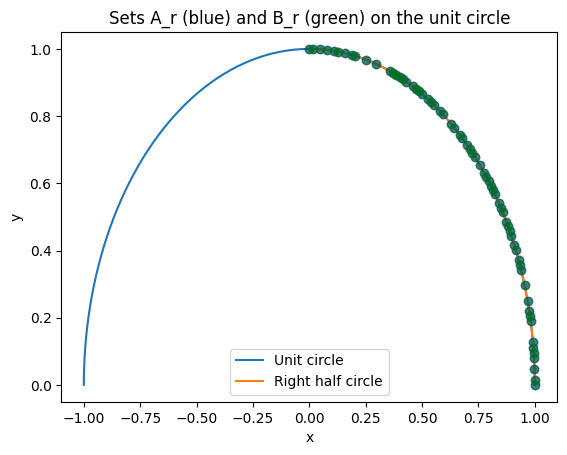

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the functions f1 and f2
def f1(theta):
    return np.arcsin(np.sin(theta)) + np.pi/2 * (1 - np.pi / (2 * theta))

def f2(theta):
    return np.arcsin(np.cos(theta)) + np.pi/2 * (1 - np.pi / (2 * theta))

# Define the unit circle and right half circle
theta = np.linspace(0, np.pi, 200)
x_unit = np.cos(theta)
y_unit = np.sin(theta)
x_right = x_unit[theta <= np.pi/2]
y_right = y_unit[theta <= np.pi/2]

# Define the sets A_r and B_r
r = 0.5  # Set the radius
A_r = []
B_r = []
for theta in np.linspace(0, np.pi/2, 100):
    # Convert theta to x and y coordinates on the unit circle
    x = np.cos(theta)
    y = np.sin(theta)

    # Check if (x, y) is in A_r
    if x >= 0 and y >= 0 and x**2 + y**2 == 1 and np.arcsin(x) >= f1(np.arcsin(r * x)):
        A_r.append((x, y))

    # Check if (x, y) is in B_r
    if x >= 0 and y >= 0 and x**2 + y**2 == 1 and np.arcsin(y) >= f2(np.arcsin(r * y)):
        B_r.append((x, y))

# Plot the unit circle, right half circle, sets A_r and B_r
fig, ax = plt.subplots()
ax.plot(x_unit, y_unit, label='Unit circle')
ax.plot(x_right, y_right, label='Right half circle')

for point in A_r:
    ax.plot(point[0], point[1], marker='o', color='b', alpha=0.5)

for point in B_r:
    ax.plot(point[0], point[1], marker='o', color='g', alpha=0.5)

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Sets A_r (blue) and B_r (green) on the unit circle')
ax.legend()

# Show the plot
plt.show()

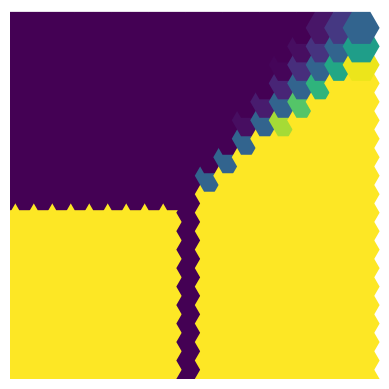

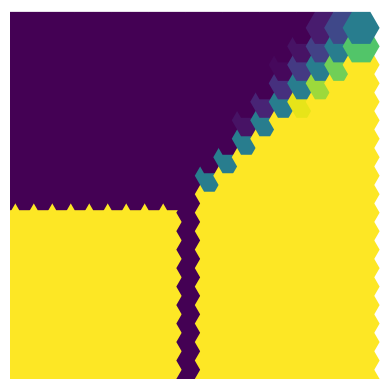

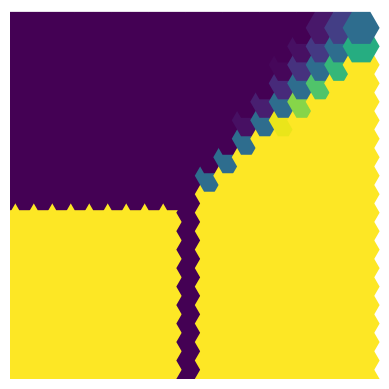

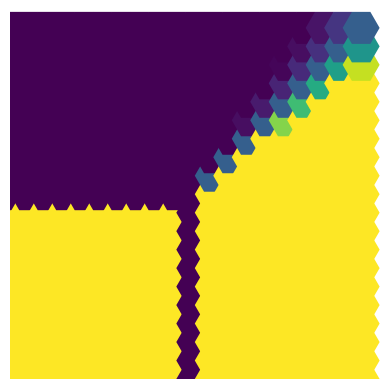

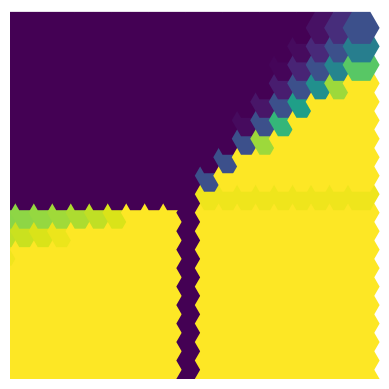

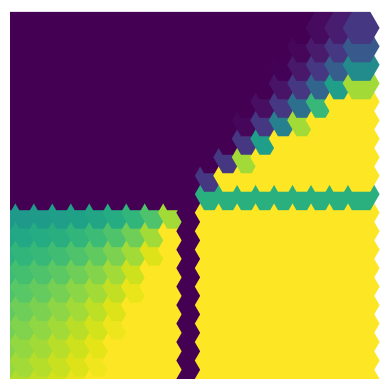

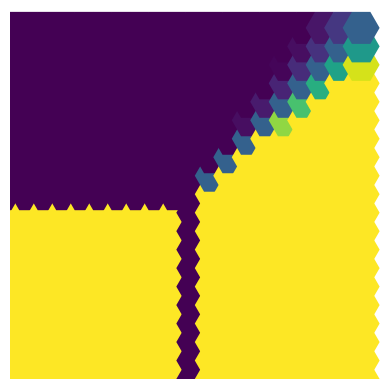

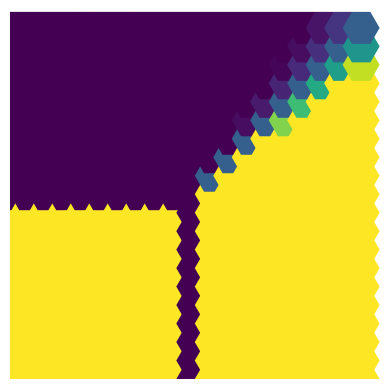

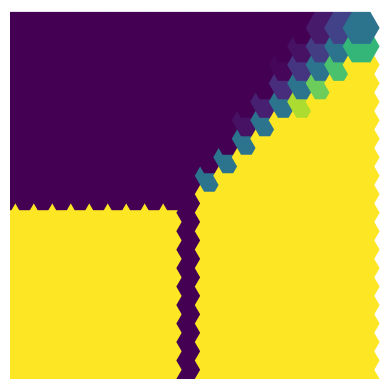

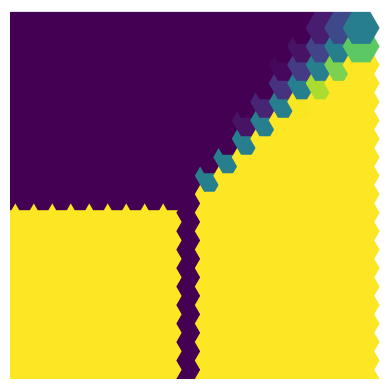

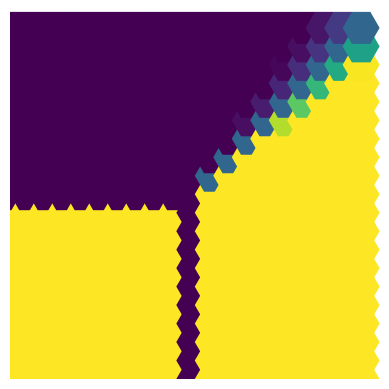

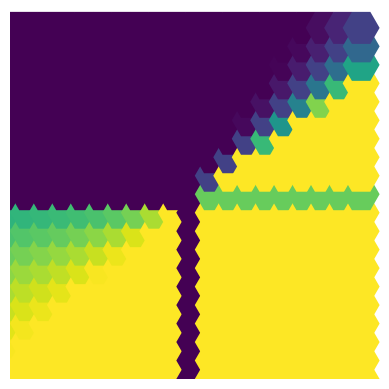

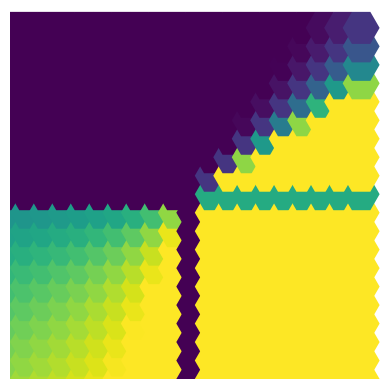

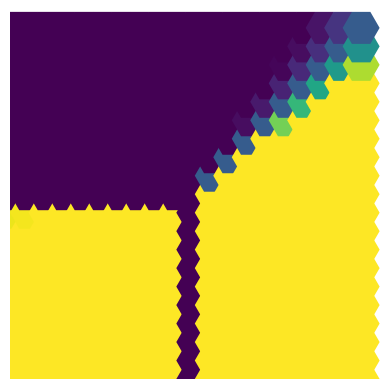

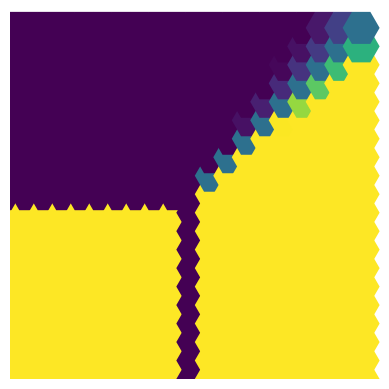

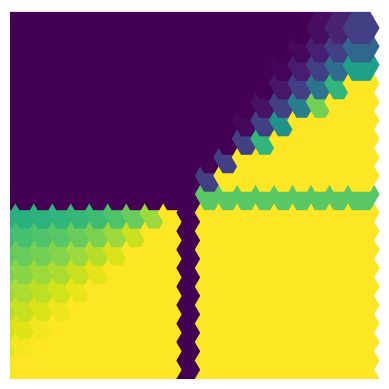

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sympy as sp
import networkx as nx

# Constants
theta_inf = 2 * np.pi
r = 0.5

# Functions f1 and f2
def f1(theta):
    if theta == 0:
        return np.pi / 2
    return np.arcsin(np.sin(theta)) + (np.pi / 2) * (1 - np.pi / (2 * theta))

def f2(theta):
    if theta == 0:
        return np.pi / 2
    return np.arcsin(np.cos(theta)) + (np.pi / 2) * (1 - np.pi / (2 * theta))

# Define decision graph for logic modulation
def create_decision_graph():
    G = nx.DiGraph()
    logical_nodes = ['psi_1', 'psi_2', 'omega', 'phi']
    for node in logical_nodes:
        G.add_node(node, value=np.random.rand())
    return G

# Logic vector and logic operations
def update_logic_vector(G, logic_expr):
    G.nodes['phi']['value'] = logic_expr  # Update the logic value based on user input

# Function to randomly update the logic values for demonstration purposes
def random_logic_update(G):
    for node in G:
        G.nodes[node]['value'] = np.random.rand()

# Tessellation visualization
def visualize_tessellation(G, domain, hex_centers, hex_size):
    plt.ion()
    fig, ax = plt.subplots()
    for center in hex_centers:
        x, y = center
        theta = np.arctan2(y, x) if x != 0 else np.pi / 2
        efficiency_value = f1(theta) * f2(theta)
        logic_values = [G.nodes[node]['value'] for node in G]
        decision_value = np.mean(logic_values)
        adjusted_efficiency = efficiency_value * decision_value
        hexagon = patches.RegularPolygon(center, numVertices=6, radius=hex_size, orientation=np.pi/6)
        color_value = np.clip(adjusted_efficiency, 0, 1)
        hexagon.set_facecolor(plt.cm.viridis(color_value))
        ax.add_patch(hexagon)
    ax.set_xlim(domain[0], domain[1])
    ax.set_ylim(domain[2], domain[3])
    ax.set_aspect('equal')
    plt.axis('off')
    plt.show()

# Domain and hexagon size for tessellation
domain = (-5, 5, -5, 5)
hex_size = 0.5

# Construct hexagon centers
hex_centers = [(i, j) for i in np.arange(domain[0], domain[1], hex_size)
               for j in np.arange(domain[2], domain[3], hex_size)]

# Create decision graph with random node values
G = create_decision_graph()

# Simulation loop
for _ in range(16):  # Simulate user input and updating the graph 3 times
    # Randomly update the logic values
    random_logic_update(G)
    # Re-visualize the updated tessellation
    visualize_tessellation(G, domain, hex_centers, hex_size)
    plt.pause(1)  # Pause for visual effect

plt.ioff()  # Turn off interactive mode
plt.show()

In [ ]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import clear_output

# Define the function influenced by the symbolic formula
Omega = 2.0  # Just an example global scaling factor
epsilon = 1e-8  # Small constant to avoid division by zero

def symbolic_function(x, y, t):
    # Avoid division by zero at the origin
    nabla = np.sqrt(x**2 + y**2) if x**2 + y**2 > 0 else epsilon

    # Interpreting Delta as differences/deltas in x and y
    Delta_x = np.cos(x + t)
    Delta_y = np.sin(y + t)

    # Combining the symbolic operations using creative interpretations
    result = Omega * (Delta_x * complex(0, 1) + Delta_y / nabla) * \
            ((np.sin(x * y * Omega * t) * nabla) + Delta_x / (complex(0, 1) + 1 / nabla))
    return result.real  # Take real part to get a value we can map to colors

# Tessellation parameters
domain = (-5, 5, -5, 5)
hex_size = 0.5
hex_centers = [(i, j) for i in np.arange(domain[0], domain[1], hex_size)
               for j in np.arange(domain[2], domain[3], hex_size)]

# Widget for time control
t_slider = widgets.FloatSlider(value=0, min=0, max=50, step=0.1, description="Time", continuous_update=False)

@widgets.interact(t=t_slider)
def update_visualizations(t):
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(10, 10))

    # Map color scale from -1 to 1 to [0, 1] for colormap compatibility
    color_min, color_max = -1, 1

    # Create tessellation pattern with colors based on the 'symbolic_function'
    for center in hex_centers:
        x, y = center
        color_value = symbolic_function(x, y, t)
        # Scale color_value to the 0-1 range for colormap
        color_value_normalized = (color_value - color_min) / (color_max - color_min)
        hexagon = patches.RegularPolygon(center, numVertices=6, radius=hex_size, orientation=np.pi/6)
        hexagon.set_facecolor(plt.cm.viridis(color_value_normalized))
        ax.add_patch(hexagon)

    ax.set_xlim(domain[0], domain[1])
    ax.set_ylim(domain[2], domain[3])
    ax.set_aspect('equal')
    plt.axis('off')
    plt.show()

# Display the widget
display(t_slider)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='Time', max=50.0), Output())…

FloatSlider(value=0.0, continuous_update=False, description='Time', max=50.0)

In [ ]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import clear_output

# Define the function influenced by the symbolic formula
Omega = 2.0  # Just an example of a scaling factor
epsilon = 1e-10  # Small number to prevent division by zero

def symbolic_function(x, y, t):
    # Calculate 'nabla' with a safety for division by zero at the origin (0,0)
    nabla = np.sqrt(x**2 + y**2) if x**2 + y**2 > 0 else epsilon

    # Calculate Delta_x and Delta_y with time variation
    Delta_x = np.cos(x + t)
    Delta_y = np.sin(y + t)

    # Symbolic expression interpretation with complex numbers
    # The operations have been creatively interpreted for demonstration purposes
    result = Omega * (Delta_x * complex(0, 1) + Delta_y / nabla) *\
             ((np.sin(x * y * Omega * t) * nabla) + Delta_x / (complex(0, 1) + 1 / nabla))
    # Return the absolute value to get a positive value for color mapping
    return abs(result.real)

# Tessellation parameters
domain = (-5, 5, -5, 5)
hex_size = 0.5
hex_centers = [(i, j) for i in np.arange(domain[0], domain[1], hex_size)
               for j in np.arange(domain[2], domain[3], hex_size)]

# Widget for time control
t_slider = widgets.FloatSlider(value=0, min=0, max=50, step=0.1, description="Time", continuous_update=False)

# Main update function for the visualization
@widgets.interact(t=t_slider)
def update_visualizations(t):
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(10, 10))

    # Create tessellation pattern with colors based on the symbolic_function
    color_values = np.array([symbolic_function(x, y, t) for x, y in hex_centers])
    # Normalize color values to [0, 1] range
    color_min, color_max = np.min(color_values), np.max(color_values)
    color_values_normalized = (color_values - color_min) / (color_max - color_min)

    for i, center in enumerate(hex_centers):
        hexagon = patches.RegularPolygon(center, numVertices=6, radius=hex_size, orientation=np.pi/6)
        hexagon.set_facecolor(plt.cm.viridis(color_values_normalized[i]))
        ax.add_patch(hexagon)

    # Set properties for the plot
    ax.set_xlim(domain[0], domain[1])
    ax.set_ylim(domain[2], domain[3])
    ax.set_aspect('equal')
    plt.axis('off')
    plt.show()

# Display the widget
display(t_slider)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='Time', max=50.0), Output())…

FloatSlider(value=0.0, continuous_update=False, description='Time', max=50.0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import ipywidgets as widgets
from IPython.display import clear_output

# Imaginatively define some of the custom symbols with parameters and functions
Omega = 2.0
gamma = 0.9
A_circle = 1.0
i_const = 1.0
heart_factor = np.random.rand()

# Custom function that interprets the expression for a given (x, y)
def interpret_quasi_quanta(x, y, t):
    # Add some randomness to the color variation
    random_effect = heart_factor * np.random.uniform(0.8, 1.2)

    # Calculate a difference representing Delta and Nabla as a distance from center
    distance = np.sqrt(x**2 + y**2)
    delta = np.abs(x - y)

    # Harmonic operations as a combination of sines and cosines
    harmonic = np.sin(Omega * distance * t) + np.cos(gamma * t)

    # Simulate the complex formula by combining terms in a creative way
    result = harmonic * delta * A_circle / (i_const + random_effect) * random_effect
    return result

# Tessellation parameters
domain = (-5, 5, -5, 5)
hex_size = 0.5
hex_centers = [(i, j) for i in np.arange(domain[0], domain[1], hex_size)
               for j in np.arange(domain[2], domain[3], hex_size)]

# Widget for time control
t_slider = widgets.FloatSlider(value=0, min=0, max=50, step=0.1, description="Time", continuous_update=False)

# Visualization function that applies the interpretive quasi-quanta function
@widgets.interact(t=t_slider)
def update_visualizations(t):
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(10, 10))

    # Calculate color values based on quasi-quanta function interpretation
    color_values = np.array([interpret_quasi_quanta(x, y, t) for x, y in hex_centers])
    # Normalize color values to [0, 1] range
    color_min, color_max = color_values.min(), color_values.max()
    color_values_normalized = (color_values - color_min) / (color_max - color_min)

    # Plot the tessellation and fill hexagons based on the color values
    for idx, center in enumerate(hex_centers):
        hexagon = patches.RegularPolygon(center, numVertices=6, radius=hex_size, orientation=np.pi/6)
        hexagon.set_facecolor(plt.cm.viridis(color_values_normalized[idx]))
        ax.add_patch(hexagon)

    # Finalize plot settings
    ax.set_xlim(domain[0], domain[1])
    ax.set_ylim(domain[2], domain[3])
    ax.set_aspect('equal')
    plt.axis('off')
    plt.show()

# Display the widget
display(t_slider)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='Time', max=50.0), Output())…

FloatSlider(value=0.0, continuous_update=False, description='Time', max=50.0)

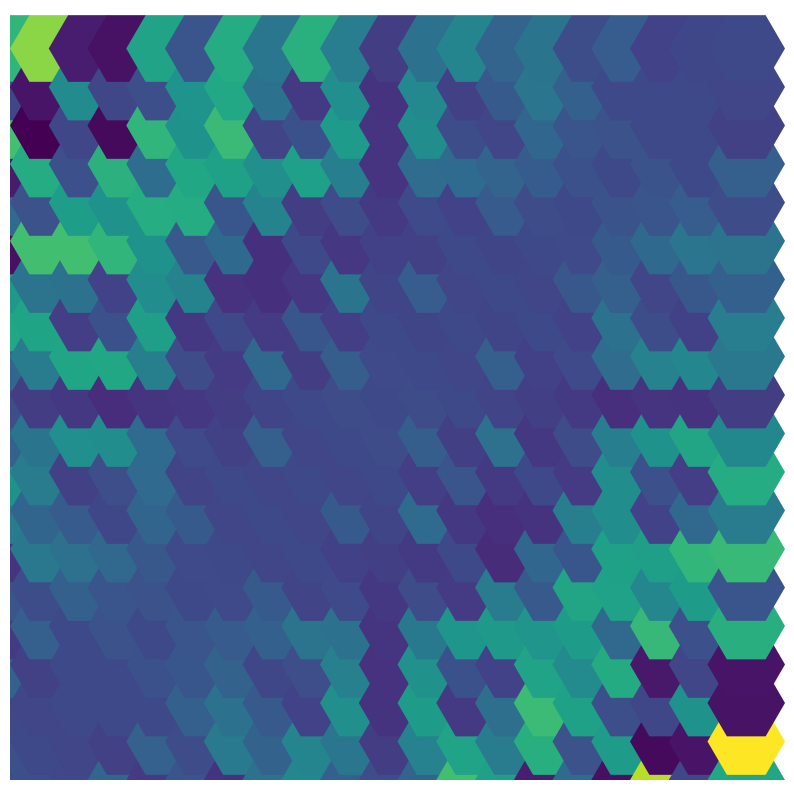

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ipywidgets import widgets, HBox, VBox
from IPython.display import display, clear_output

# Imaginatively define some of the custom symbols with parameters and functions
Omega = 2.0
gamma = 0.9
A_circle = 1.0
i_const = 1.0
heart_factor = np.random.rand()

# Custom function that interprets the expression for a given (x, y)
def interpret_quasi_quanta(x, y, t):
    # Add some randomness to the color variation
    random_effect = heart_factor * np.random.uniform(0.8, 1.2)

    # Calculate a difference representing Delta and Nabla as a distance from center
    distance = np.sqrt(x**2 + y**2)
    delta = np.abs(x - y)

    # Harmonic operations as a combination of sines and cosines
    harmonic = np.sin(Omega * distance * t) + np.cos(gamma * t)

    # Simulate the complex formula by combining terms in a creative way
    result = harmonic * delta * A_circle / (i_const + random_effect) * random_effect
    return result

# Tessellation parameters
domain = (-5, 5, -5, 5)
hex_size = 0.5
hex_centers = [(i, j) for i in np.arange(domain[0], domain[1], hex_size)
               for j in np.arange(domain[2], domain[3], hex_size)]

# Define and display the widget layout
t_slider = widgets.FloatSlider(value=0, min=0, max=50, step=0.1, description="Time", continuous_update=False)
forward_button = widgets.Button(description=">", button_style='primary', layout=widgets.Layout(width='30px'))
backward_button = widgets.Button(description="<", button_style='primary', layout=widgets.Layout(width='30px'))

# Function to draw the tessellation based on the slider
def draw_tessellation(t):
    fig, ax = plt.subplots(figsize=(10, 10))
    color_values = np.array([interpret_quasi_quanta(x, y, t) for x, y in hex_centers])
    color_min, color_max = color_values.min(), color_values.max()
    color_values_normalized = (color_values - color_min) / (color_max - color_min)
    for idx, center in enumerate(hex_centers):
        hexagon = patches.RegularPolygon(center, numVertices=6, radius=hex_size, orientation=np.pi/6)
        hexagon.set_facecolor(plt.cm.viridis(color_values_normalized[idx]))
        ax.add_patch(hexagon)
    ax.set_xlim(domain[0], domain[1])
    ax.set_ylim(domain[2], domain[3])
    plt.axis('off')
    plt.show()

# Button click events change the value of the slider
def on_forward_button_clicked(b):
    t_slider.value = min(t_slider.value + t_slider.step, t_slider.max)

def on_backward_button_clicked(b):
    t_slider.value = max(t_slider.value - t_slider.step, t_slider.min)

forward_button.on_click(on_forward_button_clicked)
backward_button.on_click(on_backward_button_clicked)

# Create an interactive environment reacting to slider and button events
ui = HBox([backward_button, t_slider, forward_button])

def t_slider_eventhandler(change):
    clear_output(wait=True)
    draw_tessellation(change.new)
    display(ui)

t_slider.observe(t_slider_eventhandler, names='value')

# Initial plot display
draw_tessellation(t_slider.value)
# Display the UI (slider and buttons)
display(ui)

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import networkx as nx

# Constants for the initial state
initial_R = 5  # Initial radius of the circle
initial_omega = 2 * np.pi  # Initial angular velocity (in radians per second)
t_max = 10  # Maximum time for the slider

# Create sliders for time, radius, and angular velocity
t_slider = widgets.FloatSlider(value=0, min=0, max=t_max, step=0.1, description="Time (s)")
R_slider = widgets.FloatSlider(value=initial_R, min=1, max=10, step=0.5, description="Radius (m)")
omega_slider = widgets.FloatSlider(value=initial_omega, min=0, max=4*np.pi, step=0.1*np.pi, description="Ang. Vel. (rad/s)")

# Function to update the properties of the tessellation graph
def update_tessellation_properties(t, R, omega):
    # You can modify this code to change how the graph properties are affected by time, radius, and angular velocity
    # For this example, we change the number of nodes in the graph and their connections based on the angular velocity
    num_nodes = 5 + int(10 * np.abs(np.sin(omega * t)))
    G = nx.DiGraph()
    G.add_nodes_from(range(num_nodes))
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if np.random.rand() < 0.5:  # Randomly decide if an edge should be added
                G.add_edge(i, j)
    return G

# Function to create the visualization
def visualize(t, R, omega):
    # Calculate position on the circle
    x = R * np.cos(omega * t)
    y = R * np.sin(omega * t)

    # Create figure and axes for the two subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # First subplot: Time compass
    circle = plt.Circle((0, 0), R, color='blue', fill=False)
    ax[0].add_artist(circle)
    ax[0].plot([0, x], [0, y], color='red')  # Line from center to the point
    ax[0].plot(x, y, 'ro')  # The point on the circumference

    ax[0].set_xlim(-R * 1.5, R * 1.5)
    ax[0].set_ylim(-R * 1.5, R * 1.5)
    ax[0].set_aspect('equal')
    ax[0].set_title("Time Compass")

    # Second subplot: Tessellation graph affected by the compass
    G = update_tessellation_properties(t, R, omega)
    pos = nx.circular_layout(G)  # Arrange in a circle
    nx.draw(G, pos, ax=ax[1], with_labels=True, node_color='skyblue', arrowsize=20)
    ax[1].set_title("Tessellation Graph")

    # Display the plots
    plt.show()

# Widgets to control the visualizations
widgets.interact(visualize,
                 t=t_slider,
                 R=R_slider,
                 omega=omega_slider)

interactive(children=(FloatSlider(value=0.0, description='Time (s)', max=10.0), FloatSlider(value=5.0, descrip…

<function __main__.visualize(t, R, omega)>

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sympy as sp
import networkx as nx

# Define the functions required for the tessellation pattern
def f1(theta):
    if theta == 0:
        return np.pi / 2
    return np.arcsin(np.sin(theta)) + (np.pi / 2) * (1 - np.pi / (2 * theta))

def f2(theta):
    if theta == 0:
        return np.pi / 2
    return np.arcsin(np.cos(theta)) + (np.pi / 2) * (1 - np.pi / (2 * theta))

# Initialize domain and hex centers for the tessellation
domain = (-5, 5, -5, 5)
hex_size = 0.5
hex_centers = [(i, j) for i in np.arange(domain[0], domain[1], hex_size) for j in np.arange(domain[2], domain[3], hex_size)]

# Define sliders for time, radius and angular velocity
t_slider = widgets.FloatSlider(value=0, min=0, max=100, step=0.1, description="Time (s)")
R_slider = widgets.FloatSlider(value=5, min=1, max=10, step=0.5, description="Radius (m)")
omega_slider = widgets.FloatSlider(value=2 * np.pi, min=0, max=4 * np.pi, step=0.1 * np.pi, description="Ang. Vel. (rad/s)")

# Function to create the tessellation visualization
def visualize_tessellation(t, R, omega):
    fig, ax = plt.subplots()
    for center in hex_centers:
        x, y = center
        theta = np.arctan2(y, x) if x != 0 else np.pi / 2
        efficiency_value = f1(theta) * f2(theta) * (1 - f1(theta)) * (1 - f2(theta))
        color_value = np.clip(efficiency_value * np.sin(omega * t), 0, 1)
        hexagon = patches.RegularPolygon((x, y), numVertices=6, radius=hex_size, orientation=np.pi/6)
        hexagon.set_facecolor(plt.cm.viridis(color_value))
        ax.add_patch(hexagon)

    # Adjust the layout or structure of the graph based on the current x and y positions
    # of the particle on the time compass
    current_x_pos = R * np.cos(omega * t)
    current_y_pos = R * np.sin(omega * t)
    # The layout can be influenced by current_x_pos and current_y_pos
    # For example, we can use these values to determine the size or layout of the hexagons

    ax.set_xlim(domain[0], domain[1])
    ax.set_ylim(domain[2], domain[3])
    ax.set_aspect('equal')
    plt.axis('off')

    # Display the plot
    plt.show()

# Function to create the time compass visualization
def visualize_circular_motion(t, R, omega):
    fig, ax = plt.subplots()

    # Draw circle and plot the current position of the particle
    circle = plt.Circle((0, 0), R, color='blue', fill=False)
    ax.add_artist(circle)

    x_path = R * np.cos(omega * np.linspace(0, t, 100))
    y_path = R * np.sin(omega * np.linspace(0, t, 100))
    ax.plot(x_path, y_path, color='gray', linestyle='--')

    current_x_pos = R * np.cos(omega * t)
    current_y_pos = R * np.sin(omega * t)
    ax.arrow(0, 0, current_x_pos, current_y_pos, head_width=R/20, head_length=R/15, fc='red', ec='red')
    ax.scatter(current_x_pos, current_y_pos, color='red')

    ax.set_xlabel("x (m)")
    ax.set_ylabel("y (m)")
    ax.set_xlim(-R * 1.5, R * 1.5)
    ax.set_ylim(-R * 1.5, R * 1.5)
    ax.set_aspect('equal')

    # Update tessellation based on current values
    visualize_tessellation(t, R, omega)

    # Display the plot
    plt.show()

# Link sliders to visualization function
widgets.interactive(visualize_circular_motion, t=t_slider, R=R_slider, omega=omega_slider)

interactive(children=(FloatSlider(value=0.0, description='Time (s)'), FloatSlider(value=5.0, description='Radi…

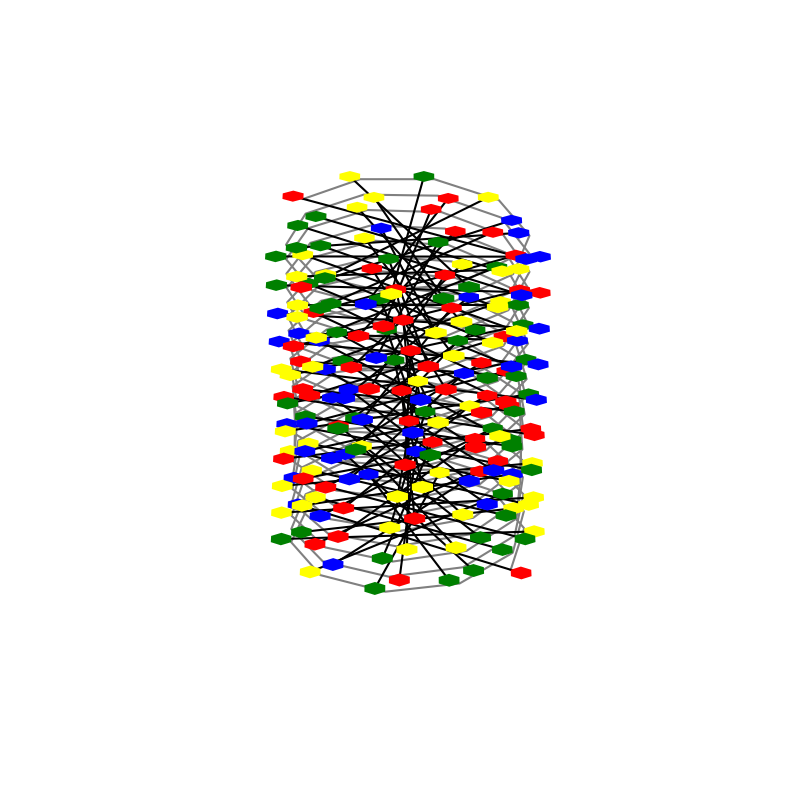

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
from mpl_toolkits.mplot3d import Axes3D, art3d
import networkx as nx
import itertools

# Basic parameters for the DNA double helix and nucleotide representation
helix_turns = 10
base_pairs_per_turn = 10
height_per_turn = 2
radius = 1
base_pair_distance = 0.2  # Distance between the base pairs in a pair
hex_size = 0.1  # Size of the hexagon representing the nucleotide

# Colors to represent different nucleotides (optional, for illustration)
nucleotide_colors = {
    'A': 'green',    # Adenine
    'T': 'red',      # Thymine
    'C': 'blue',     # Cytosine
    'G': 'yellow'    # Guanine
}

# Setup for the figure
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111, projection='3d')

# Generate the helix backbone
t = np.linspace(0, helix_turns * 2 * np.pi, helix_turns * base_pairs_per_turn)
z = np.linspace(0, helix_turns * height_per_turn, helix_turns * base_pairs_per_turn)
x_helix1 = radius * np.cos(t)
y_helix1 = radius * np.sin(t)
x_helix2 = radius * np.cos(t + np.pi)
y_helix2 = radius * np.sin(t + np.pi)
ax.plot(x_helix1, y_helix1, z, color='gray')
ax.plot(x_helix2, y_helix2, z, color='gray')

# Function to generate the logic states
def generate_logic_states(num_states):
    logic_ops = ['A', 'T', 'C', 'G']
    return np.random.choice(logic_ops, num_states)

# Generate random logic states for nucleotides
nucleotides = generate_logic_states(helix_turns * base_pairs_per_turn)

# Generate the nucleotide base pair hexagons
for i, (nuc1, nuc2, h) in enumerate(zip(nucleotides, reversed(nucleotides), z)):
    # Create the hexagon for the first nucleotide
    color1 = nucleotide_colors[nuc1]
    center1 = (x_helix1[i] + base_pair_distance / 2, y_helix1[i], h)
    hex1 = RegularPolygon(center1[:2], numVertices=6, radius=hex_size, orientation=np.radians(90), facecolor=color1)
    ax.add_patch(hex1)
    art3d.pathpatch_2d_to_3d(hex1, z=center1[2], zdir="z")

    # Create the hexagon for the second nucleotide
    color2 = nucleotide_colors[nuc2]
    center2 = (x_helix2[i] - base_pair_distance / 2, y_helix2[i], h)
    hex2 = RegularPolygon(center2[:2], numVertices=6, radius=hex_size, orientation=np.radians(90), facecolor=color2)
    ax.add_patch(hex2)
    art3d.pathpatch_2d_to_3d(hex2, z=center2[2], zdir="z")

    # Draw connections between nucleotides to represent base pairing
    ax.plot((center1[0], center2[0]), (center1[1], center2[1]), (center1[2], center2[2]), color='black')

# Set plot display parameters
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-radius*2, radius*2)
ax.set_ylim(-radius*2, radius*2)
ax.set_zlim(0, helix_turns * height_per_turn)
plt.axis('off')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
from mpl_toolkits.mplot3d import Axes3D, art3d
import ipywidgets as widgets
from IPython.display import display, clear_output

# Constants for DNA parameters and visual representations
helix_turns = 5
base_pairs_per_turn = 10
height_per_turn = 2
radius = 1

# Constants for quasi-quanta interpretations
Omega = 2.0
gamma = 0.9
heart_factor = np.random.rand()

# Function definitions...

# Function to generate the logic states
def generate_logic_states(num_states):
    logic_ops = ['A', 'T', 'C', 'G']  # For nucleotides
    return np.random.choice(logic_ops, num_states)

# Custom function that interprets an expression for (x, y)
def interpret_expression(x, y, t):
    distance = np.sqrt(x**2 + y**2)
    delta_nabla = np.abs(x - y)
    harmonic = np.sin(Omega * distance * t) + np.cos(gamma * t)
    return harmonic * delta_nabla * heart_factor

# Visualize the DNA molecule with tessellation representing gene expression
def visualize_genetics(t):
    clear_output(wait=True)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Generate DNA helix backbone
    num_nucleotides = helix_turns * base_pairs_per_turn
    helix_t = np.linspace(0, 2 * np.pi * helix_turns, num_nucleotides)
    z = np.linspace(0, height_per_turn * helix_turns, num_nucleotides)
    x_helix1 = radius * np.cos(helix_t)
    y_helix1 = radius * np.sin(helix_t)
    x_helix2 = radius * np.cos(helix_t + np.pi)
    y_helix2 = radius * np.sin(helix_t + np.pi)
    ax.plot(x_helix1, y_helix1, z, color='gray')
    ax.plot(x_helix2, y_helix2, z, color='gray')

    # Plot random nucleotides with colors
    nucleotides = generate_logic_states(num_nucleotides)
    for i, nuc in enumerate(nucleotides):
        center = (x_helix1[i], y_helix1[i], z[i])
        hex_size = 0.1  # Size of hexagons as nucleotides for DNA visualization
        expression_value = interpret_expression(center[0], center[1], t)
        color_value = np.clip(expression_value, 0, 1)
        hexagon = RegularPolygon(center[:2], numVertices=6, radius=hex_size, orientation=np.radians(90))
        hexagon.set_facecolor(plt.cm.viridis(color_value))
        ax.add_patch(hexagon)
        art3d.pathpatch_2d_to_3d(hexagon, z=center[2], zdir="z")

    # Set visualization parameters
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(-radius*2, radius*2)
    ax.set_ylim(-radius*2, radius*2)
    ax.set_zlim(0, helix_turns * height_per_turn)
    plt.axis('off')
    plt.show()

# Time slider widget for controlling simulation
t_slider = widgets.FloatSlider(value=0, min=0, max=10, step=0.1, description="Time", continuous_update=True)

# Link slider to visualization function
widgets.interact(visualize_genetics, t=t_slider)

interactive(children=(FloatSlider(value=0.0, description='Time', max=10.0), Output()), _dom_classes=('widget-i…

<function __main__.visualize_genetics(t)>

Enter your logic formula or 'quit' to exit: psi_1 psi_2 phi
An error occurred during logic evaluation: Sympify of expression 'could not parse 'psi_1 psi_2 phi'' failed, because of exception being raised:
SyntaxError: invalid syntax (<string>, line 1)


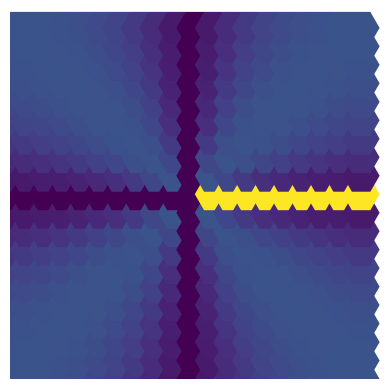

KeyboardInterrupt: Interrupted by user

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import networkx as nx
import sympy as sp

# Define wrapper function for symbolic evaluation
def evaluate_logic_expression(logic_expr, variables):
    sym_formula = sp.sympify(logic_expr)
    logic_eval = sp.lambdify(variables, sym_formula, "numpy")
    return logic_eval

# Functions f1 and f2 simplified
def f1(theta):
    return np.pi / 2 if theta == 0 else np.abs(np.arcsin(np.sin(theta)))

def f2(theta):
    return np.pi / 2 if theta == 0 else np.abs(np.arcsin(np.cos(theta)))

# Define decision graph for logic modulation
def create_decision_graph(variables):
    G = nx.DiGraph()
    for var in variables:
        G.add_node(str(var), value=np.random.rand())
    return G

# Update the logic values based on the user's logic expression
def update_logic_values(G, logic_expr, variables):
    try:
        logic_eval = evaluate_logic_expression(logic_expr, variables)
        # Update the values with a given logic expression
        truth_values = {str(var): G.nodes[str(var)]['value'] for var in variables}
        for node, value in truth_values.items():
            G.nodes[node]['value'] = 1.0 if logic_eval(**truth_values) else 0.0
    except Exception as e:
        print(f"An error occurred during logic evaluation: {e}")

# Function to visualize the decision graph as a tessellation pattern
def visualize_tessellation(G, domain, hex_centers, hex_size):
    fig, ax = plt.subplots()
    for center in hex_centers:
        x, y = center
        theta = np.arctan2(y, x) if x != 0 else np.pi / 2
        efficiency_value = f1(theta) * f2(theta)
        logic_value = G.nodes['phi']['value']
        color_value = np.clip(efficiency_value * logic_value, 0, 1)
        hexagon = patches.RegularPolygon(center, numVertices=6, radius=hex_size, orientation=np.pi/6)
        hexagon.set_facecolor(plt.cm.viridis(color_value))
        ax.add_patch(hexagon)
    ax.set_xlim(domain[0], domain[1])
    ax.set_ylim(domain[2], domain[3])
    ax.set_aspect('equal')
    plt.axis('off')
    plt.show()

# Main interaction loop for the game with user input
def run_game_loop(variables):
    G = create_decision_graph(variables)
    while True:
        user_input = input("Enter your logic formula or 'quit' to exit: ")
        if user_input.lower() == 'quit':
            print("Exiting game.")
            break
        update_logic_values(G, user_input, variables)
        visualize_tessellation(G, domain, hex_centers, hex_size)

# Initialize domain and hex centers for the tessellation
domain = (-5, 5, -5, 5)
hex_size = 0.5
hex_centers = [(i, j) for i in np.arange(domain[0], domain[1], hex_size)
               for j in np.arange(domain[2], domain[3], hex_size)]

# Define symbolic variables (as many as you like!)
variables = sp.symbols('psi_1 psi_2 phi')  # You can add more variables if needed

# Start the game loop with user-defined logical variables
run_game_loop(variables)

In [ ]:
import sympy as sp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define sympy symbols and logic vector
psi_1, psi_2, phi, omega = sp.symbols('psi_1 psi_2 phi omega')

# Define logic expressions
expr_1 = psi_1 & ~psi_2
expr_2 = ~psi_1 & psi_2
expr_3 = phi
expr_4 = ~phi
expr_5 = omega
expr_6 = ~omega
expr_7 = psi_1 | psi_2
expr_8 = psi_1 | (phi & omega)

# Logic vector and corresponding expressions
logic_vector = np.array([expr_1, expr_2, expr_3, expr_4, expr_5, expr_6, expr_7, expr_8])
logic_labels = np.array(['psi_1 & ~psi_2', '~psi_1 & psi_2', 'phi', '~phi', 'omega', '~omega', 'psi_1 | psi_2', 'psi_1 | (phi & omega)'])

# Create a graph based on symbolic logic expressions
G = nx.DiGraph()
for i, expr in enumerate(logic_vector):
    G.add_node(f"expr_{i}", label=logic_labels[i])
G.add_edges_from([("expr_1", "expr_3"), ("expr_1", "expr_4"), ("expr_2", "expr_5"), ("expr_2", "expr_6"),
                  ("expr_3", "expr_7"), ("expr_4", "expr_7"), ("expr_3", "expr_8"), ("expr_5", "expr_8"),
                  ("expr_6", "expr_8")])

# Initialize visualization parameters
domain = (-5, 5, -5, 5)
hex_size = 0.75
hex_centers = [(i, j) for i in np.linspace(domain[0], domain[1], int((domain[1] - domain[0]) / hex_size))
               for j in np.linspace(domain[2], domain[3], int((domain[3] - domain[2]) / hex_size))]
t_slider = widgets.FloatSlider(value=0, min=0, max=10, step=0.1, description="Time", continuous_update=False)

# Display the graph
def display_graph(G):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 5))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=2500, font_size=12, labels=nx.get_node_attributes(G, 'label'))
    plt.title("Logic Vector Graph")
    plt.show()

# Display the tessellation
@widgets.interact(t=t_slider, psi_1_value=[False, True], psi_2_value=[False, True], phi_value=[False, True], omega_value=[False, True])
def update_visualizations(t, psi_1_value, psi_2_value, phi_value, omega_value):
    clear_output(wait=True)

    # Display logic graph with updated values
    logic_values = {'psi_1': psi_1_value, 'psi_2': psi_2_value, 'phi': phi_value, 'omega': omega_value}
    for node in ['expr_1', 'expr_2', 'expr_3', 'expr_4', 'expr_5', 'expr_6', 'expr_7', 'expr_8']:
        G.nodes[node]['value'] = logic_vector[int(node.split('_')[1]) - 1].subs(logic_values)
    display_graph(G)

    # Visualization
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.title(f"Tessellation over time t={t}")

    for center in hex_centers:
        x, y = center
        radius = hex_size
        color_value = (np.sin(t+x)*np.cos(t+y) + 1) / 2  # Example dynamic expression for coloring

        hexagon = patches.RegularPolygon(center, numVertices=6, radius=radius, orientation=np.pi / 6)
        hexagon.set_facecolor(plt.cm.viridis(color_value))
        ax.add_patch(hexagon)

    ax.set_xlim(domain[0], domain[1])
    ax.set_ylim(domain[2], domain[3])
    ax.set_aspect('equal')
    plt.axis('off')
    plt.show()

# Interactive control
display(t_slider)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='Time', max=10.0), Dropdown(…

FloatSlider(value=0.0, continuous_update=False, description='Time', max=10.0)

In [ ]:
import sympy as sp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define sympy symbols and logic vector
psi_1, psi_2, phi, omega = sp.symbols('psi_1 psi_2 phi omega')

# Define logic expressions
expr_1 = (psi_1 & ~psi_2) | (phi & omega)
expr_2 = (~psi_1 & psi_2) | (~phi & omega)
expr_3 = (~psi_1 & ~psi_2) | (phi & ~omega)
expr_4 = (psi_1 & ~psi_2) & (~phi & ~omega)

# Logic vector and corresponding expressions
logic_vector = np.array([expr_1, expr_2, expr_3, expr_4])
logic_labels = np.array(['(psi_1 & ~psi_2) | (phi & omega)', '(~psi_1 & psi_2) | (~phi & omega)', '(~psi_1 & ~psi_2) | (phi & ~omega)', '(psi_1 & ~psi_2) & (~phi & ~omega)'])

# Create a graph based on symbolic logic expressions
G = nx.DiGraph()
for i, expr in enumerate(logic_vector):
    G.add_node(f"expr_{i}", label=logic_labels[i])
G.add_edges_from([("expr_1", "expr_2"), ("expr_1", "expr_3"), ("expr_2", "expr_4"), ("expr_3", "expr_4")])

# Initialize visualization parameters
domain = (-5, 5, -5, 5)
hex_size = 0.75
hex_centers = [(i, j) for i in np.linspace(domain[0], domain[1], int((domain[1] - domain[0]) / hex_size))
               for j in np.linspace(domain[2], domain[3], int((domain[3] - domain[2]) / hex_size))]
t_slider = widgets.FloatSlider(value=0, min=0, max=10, step=0.1, description="Time", continuous_update=False)

# Display the graph
def display_graph(G):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 5))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=2500, font_size=12, labels=nx.get_node_attributes(G, 'label'))
    plt.title("Logic Vector Graph")
    plt.show()

# Display the tessellation
@widgets.interact(t=t_slider, psi_1_value=[False, True], psi_2_value=[False, True], phi_value=[False, True], omega_value=[False, True])
def update_visualizations(t, psi_1_value, psi_2_value, phi_value, omega_value):
    clear_output(wait=True)

    # Display logic graph with updated values
    logic_values = {'psi_1': psi_1_value, 'psi_2': psi_2_value, 'phi': phi_value, 'omega': omega_value}
    for node in ['expr_1', 'expr_2', 'expr_3', 'expr_4']:
        G.nodes[node]['value'] = logic_vector[int(node.split('_')[1]) - 1].subs(logic_values)
    display_graph(G)

    # Visualization
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.title(f"Tessellation over time t={t}")

    for center in hex_centers:
        x, y = center
        radius = hex_size
        color_value = (np.sin(t+x)*np.cos(t+y) + 1) / 2  # Example dynamic expression for coloring

        hexagon = patches.RegularPolygon(center, numVertices=6, radius=radius, orientation=np.pi / 6)
        hexagon.set_facecolor(plt.cm.viridis(color_value))
        ax.add_patch(hexagon)

    ax.set_xlim(domain[0], domain[1])
    ax.set_ylim(domain[2], domain[3])
    ax.set_aspect('equal')
    plt.axis('off')
    plt.show()

# Interactive control
display(t_slider)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='Time', max=10.0), Dropdown(…

FloatSlider(value=0.0, continuous_update=False, description='Time', max=10.0)

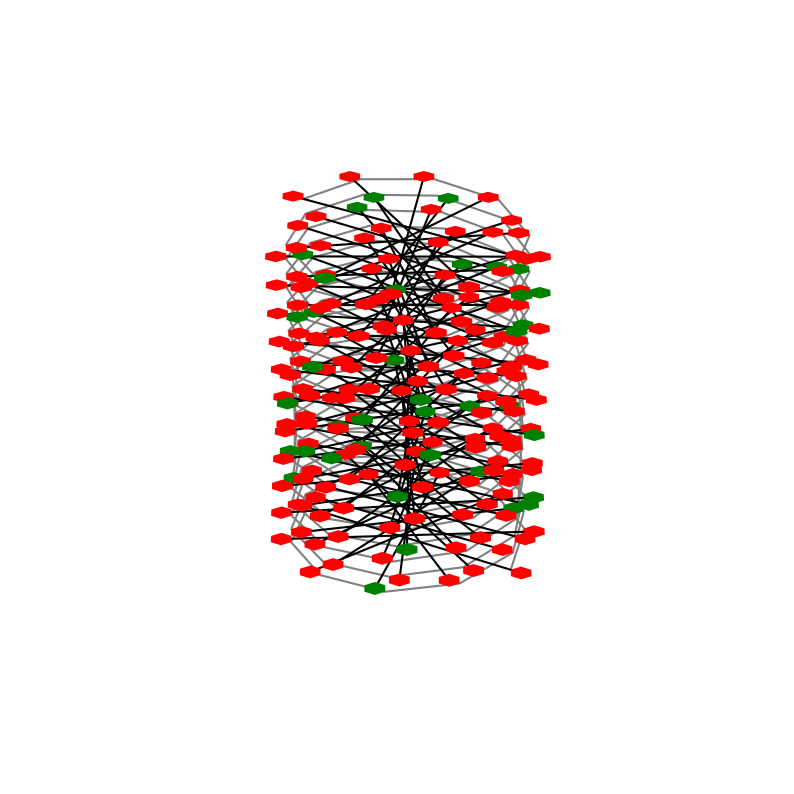

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
from mpl_toolkits.mplot3d import Axes3D, art3d
import networkx as nx
import sympy as sp

# Define sympy symbols for logic elements
psi_1, psi_2, phi, omega = sp.symbols('psi_1 psi_2 phi omega')

# Define logic expressions corresponding to the nucleotides
logic_nucleotide_map = {
    'A': psi_1 & ~psi_2,  # Adenine
    'T': ~psi_1 & psi_2,  # Thymine
    'C': phi,             # Cytosine
    'G': omega            # Guanine
}

# Logic vector and corresponding labels
logic_vector = np.array(list(logic_nucleotide_map.values()))
nucleotides = list(logic_nucleotide_map.keys())

# Function to evaluate logic expressions given truth values
def evaluate_logic_expressions(truth_values):
    results = {}
    for label, expr in logic_nucleotide_map.items():
        substituted_expr = expr.subs(truth_values)
        results[label] = bool(substituted_expr)
    return results

# Basic parameters for the DNA double helix
helix_turns = 10
base_pairs_per_turn = 10
height_per_turn = 2
radius = 1
base_pair_distance = 0.2
hex_size = 0.1  # Visualization hexagon size

# Randomly assign truth values for logic elements
truth_values = {
    'psi_1': np.random.choice([True, False]),
    'psi_2': np.random.choice([True, False]),
    'phi': np.random.choice([True, False]),
    'omega': np.random.choice([True, False])
}

# Evaluate logic expressions to determine nucleotide colors
nucleotide_logic_results = evaluate_logic_expressions(truth_values)
nucleotide_colors = {nuc: 'green' if res else 'red' for nuc, res in nucleotide_logic_results.items()}

# Setup for the figure
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111, projection='3d')

# Generate the helix backbone
t = np.linspace(0, helix_turns * 2 * np.pi, helix_turns * base_pairs_per_turn)
z = np.linspace(0, helix_turns * height_per_turn, helix_turns * base_pairs_per_turn)
x_helix1 = radius * np.cos(t)
y_helix1 = radius * np.sin(t)
x_helix2 = radius * np.cos(t + np.pi)
y_helix2 = radius * np.sin(t + np.pi)
ax.plot(x_helix1, y_helix1, z, color='gray')
ax.plot(x_helix2, y_helix2, z, color='gray')

# Generate random nucleotides for the helix
np.random.seed(0)  # Seed for reproducibility
helix_nucleotides = np.random.choice(nucleotides, helix_turns * base_pairs_per_turn)

# Generate the nucleotide base pair hexagons
for i, (nuc1, nuc2, h) in enumerate(zip(helix_nucleotides, reversed(helix_nucleotides), z)):
    # Create the hexagon for the first nucleotide and color based on truth value
    color1 = nucleotide_colors[nuc1]
    center1 = (x_helix1[i] + base_pair_distance / 2, y_helix1[i], h)
    hex1 = RegularPolygon(center1[:2], numVertices=6, radius=hex_size, orientation=np.radians(90), facecolor=color1)
    ax.add_patch(hex1)
    art3d.pathpatch_2d_to_3d(hex1, z=center1[2], zdir="z")

    # Create the hexagon for the second nucleotide and color based on truth value
    color2 = nucleotide_colors[nuc2]
    center2 = (x_helix2[i] - base_pair_distance / 2, y_helix2[i], h)
    hex2 = RegularPolygon(center2[:2], numVertices=6, radius=hex_size, orientation=np.radians(90), facecolor=color2)
    ax.add_patch(hex2)
    art3d.pathpatch_2d_to_3d(hex2, z=center2[2], zdir="z")

    # Draw connections between nucleotides to represent base pairing
    ax.plot((center1[0], center2[0]), (center1[1], center2[1]), (center1[2], center2[2]), color='black')

# Set plot display parameters
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-radius*2, radius*2)
ax.set_ylim(-radius*2, radius*2)
ax.set_zlim(0, helix_turns * height_per_turn)
plt.axis('off')

plt.show()

In [ ]:
Show its functional synthesis by allowing logic vector inputs for its division, replication and virutal-protein forming function.

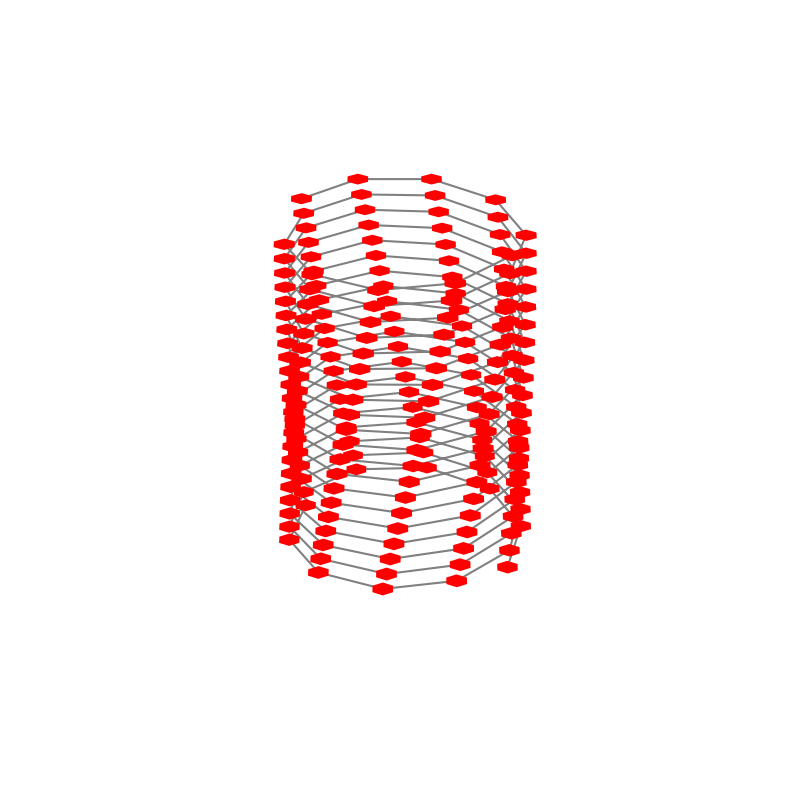

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
from mpl_toolkits.mplot3d import Axes3D, art3d

# Define sympy symbols and propositional logic expressions
psi_1, psi_2, phi, omega = sp.symbols('psi_1 psi_2 phi omega')
logic_exprs = {
    'A': psi_1 & ~psi_2,
    'T': ~psi_1 & psi_2,
    'C': phi,
    'G': ~phi,
    # Additional optional expressions for demonstration
    'AT_Combined': psi_1 | psi_2,
    'CG_Combined': phi & omega
}

# Function to evaluate the truth value of logic expressions
def evaluate_logic(expr, values):
    return bool(expr.subs(values))

# Logic coloration helper function that decides color based on logic value
def colorize_logic(logic_val):
    return 'green' if logic_val else 'red'

# Parameters for the DNA double helix model with logic-based coloration
helix_turns = 10
base_pairs_per_turn = 10
height_per_turn = 2
radius = 1
base_pair_distance = 0.2
hex_size = 0.1

# Prepare the figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Generate helix coordinates
t = np.linspace(0, helix_turns * 2 * np.pi, helix_turns * base_pairs_per_turn)
z = np.linspace(0, helix_turns * height_per_turn, helix_turns * base_pairs_per_turn)
x_helix = radius * np.cos(t)
y_helix = radius * np.sin(t)

# Assign logic values (here for simplicity, we'll cycle through A, T, C, G)
logic_assignments = [{'psi_1': False, 'psi_2': False, 'phi': False, 'omega': False},
                     {'psi_1': True, 'psi_2': False, 'phi': True, 'omega': True},
                     {'psi_1': False, 'psi_2': True, 'phi': False, 'omega': True},
                     {'psi_1': True, 'psi_2': True, 'phi': True, 'omega': False}]

# Plot helix backbones
ax.plot(x_helix, y_helix, z, color='gray')
ax.plot(-x_helix, -y_helix, z, color='gray')

# Generate nucleotide base pair hexagons with color logic
for i, (x, y, h) in enumerate(zip(x_helix, y_helix, z)):
    # Determine the nucleotide and its logic coloration
    nt = ['A', 'T', 'C', 'G'][i % 4]  # Simple example of cycling through A, T, C, G
    logic_val = evaluate_logic(logic_exprs[nt], logic_assignments[i % 4])
    color = colorize_logic(logic_val)

    # Plot hexagons as base pairs with their respective logic-based colors
    center = (x, y, h)
    hexagon = RegularPolygon(center[:2], numVertices=6, radius=hex_size, orientation=np.pi / 6, facecolor=color)
    ax.add_patch(hexagon)
    art3d.pathpatch_2d_to_3d(hexagon, z=center[2], zdir="z")

    # Other strand
    center = (-x, -y, h)
    hexagon = RegularPolygon(center[:2], numVertices=6, radius=hex_size, orientation=np.pi / 6, facecolor=color)
    ax.add_patch(hexagon)
    art3d.pathpatch_2d_to_3d(hexagon, z=center[2], zdir="z")

# Set display parameters for the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-radius*2, radius*2)
ax.set_ylim(-radius*2, radius*2)
ax.set_zlim(0, helix_turns * height_per_turn)
plt.axis('off')

plt.show()

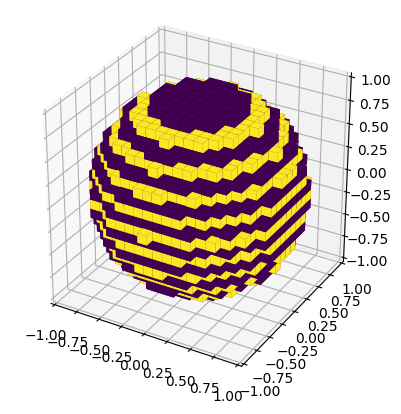

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import sympy as sp
import itertools

# Define sympy symbols and logic expressions
psi_1, psi_2, phi, omega = sp.symbols('psi_1 psi_2 phi omega')
logic_exprs = [
    psi_1 & ~psi_2,  # Represents "A"
    ~psi_1 & psi_2,  # Represents "T"
    phi,             # Represents "C"
    ~phi             # Represents "G"
]

# Assume some truth values for demonstration purposes
truth_values = {psi_1: True, psi_2: False, phi: True, omega: True}

# Evaluate the logic expression
def evaluate_logic(expressions, values):
    # Convert sympy Booleans to Python-native booleans
    eval_exprs = [expr.subs(values) for expr in expressions]
    # Convert Python-native booleans to floats
    eval_exprs = [1.0 if val == True else 0.0 for val in eval_exprs]
    return np.array(eval_exprs)

# Translate logic values to colormap values
logic_values = evaluate_logic(logic_exprs, truth_values)
colormap_values = np.interp(logic_values, (logic_values.min(), logic_values.max()), (0, 1))

# Define the colormap
colormap = plt.cm.viridis

# Functions to create cubes and visualize the tessellation
def create_cube(center, size):
    # Create vertices for the cube
    r = [-1, 1]
    vertices = list(itertools.product(r, r, r))
    vertices = np.array(vertices) * size / 2 + np.array(center)
    # Create faces
    faces = [[vertices[j] for j in [0, 1, 3, 2]],
             [vertices[j] for j in [4, 5, 7, 6]],
             [vertices[j] for j in [0, 1, 5, 4]],
             [vertices[j] for j in [2, 3, 7, 6]],
             [vertices[j] for j in [0, 2, 6, 4]],
             [vertices[j] for j in [1, 3, 7, 5]]]
    return faces

def visualize_3d_tessellation(domain, cube_size, r, colormap_values, colormap):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    xrange = np.arange(domain[0], domain[1], cube_size)
    yrange = np.arange(domain[2], domain[3], cube_size)
    zrange = np.arange(domain[4], domain[5], cube_size) # both positive and negative z for full sphere

    centers = itertools.product(xrange, yrange, zrange)
    for idx, center in enumerate(centers):
        if sum([c**2 for c in center]) <= r**2:
            color_idx = idx % len(colormap_values)  # Cycle through colormap values
            color = colormap(colormap_values[color_idx])
            cube = Poly3DCollection(create_cube(center, cube_size), facecolors=[color], linewidths=0.05, edgecolors='k')
            ax.add_collection3d(cube)

    ax.set_xlim(domain[0], domain[1])
    ax.set_ylim(domain[2], domain[3])
    ax.set_zlim(domain[4], domain[5])
    ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio
    plt.show()

domain = (-1, 1, -1, 1, -1, 1)
cube_size = 0.1
r = 1.0

# Visualize tessellation with logic-based colors
visualize_3d_tessellation(domain, cube_size, r, colormap_values, colormap)


interactive(children=(FloatSlider(value=0.0, description='Time (s)', max=10.0), FloatSlider(value=5.0, descrip…

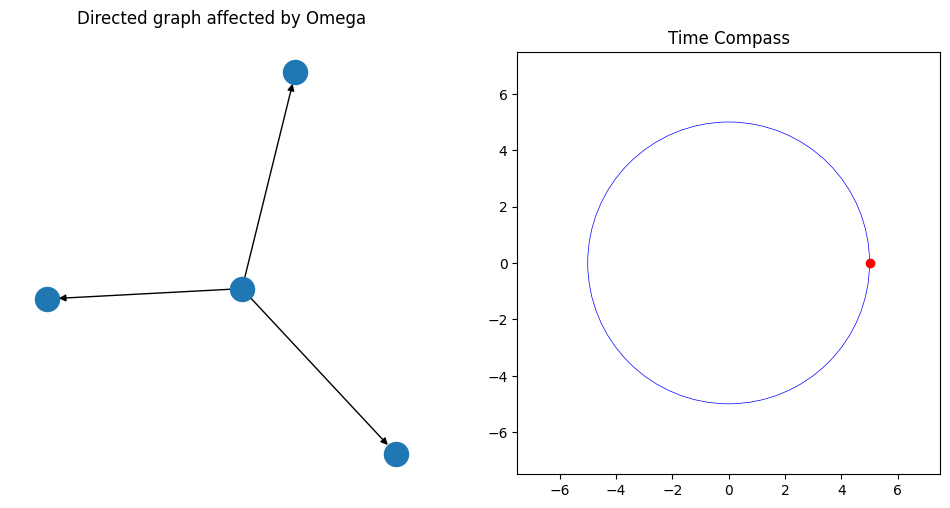

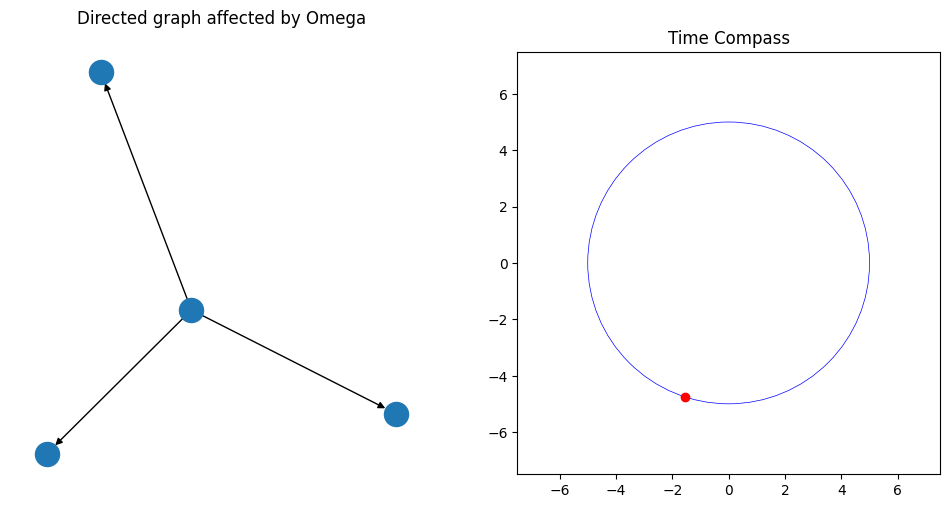

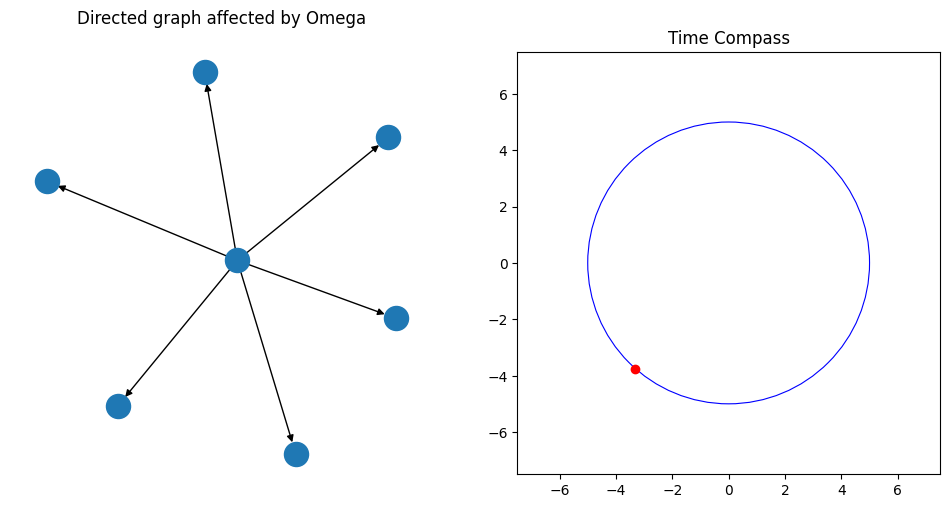

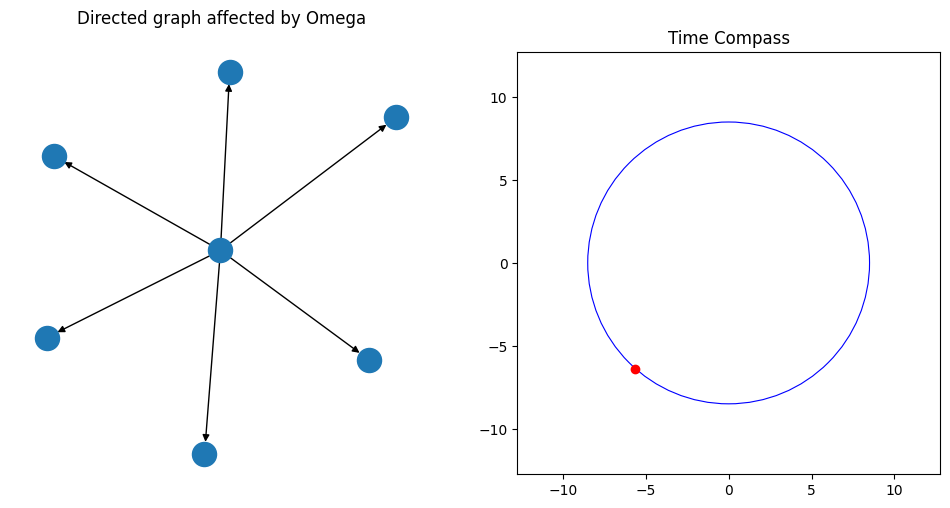

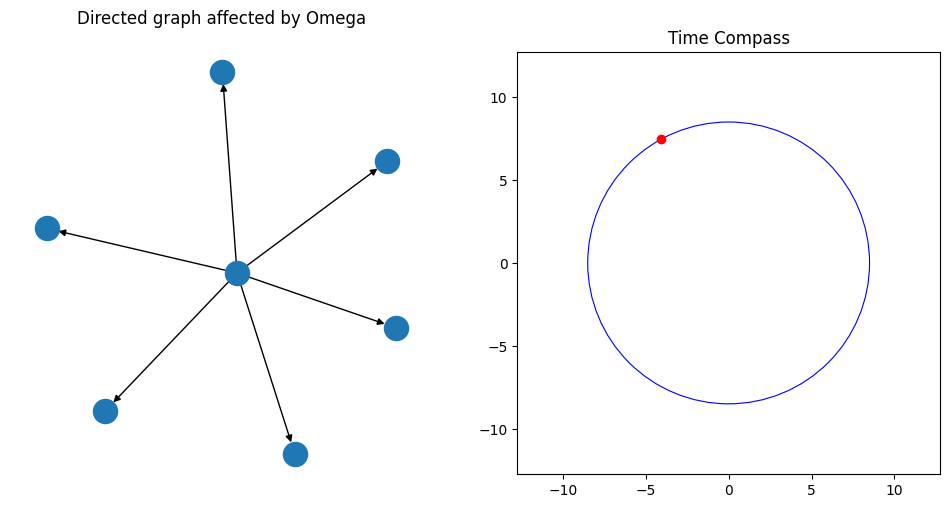

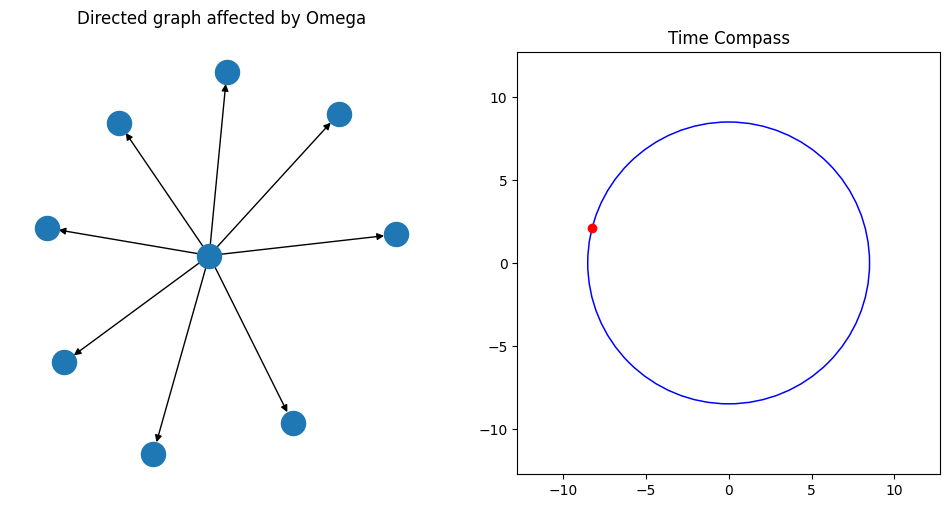

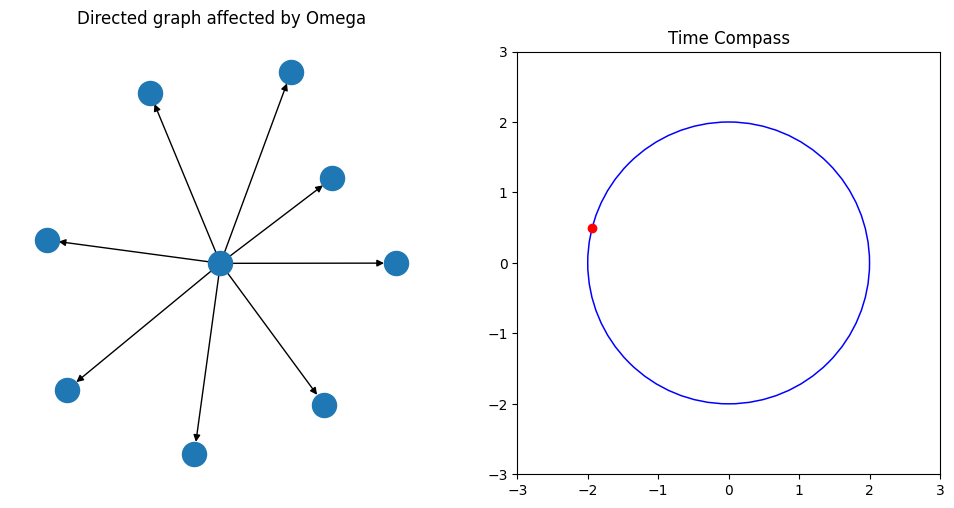

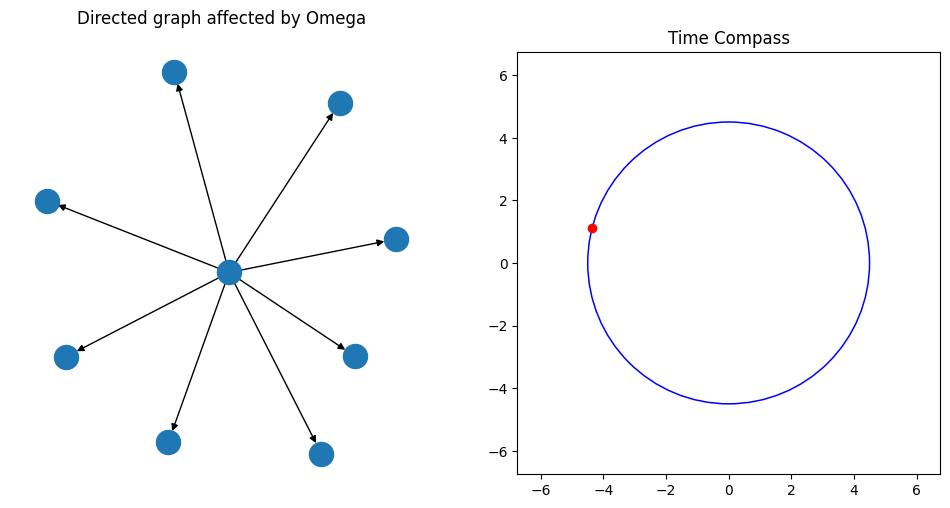

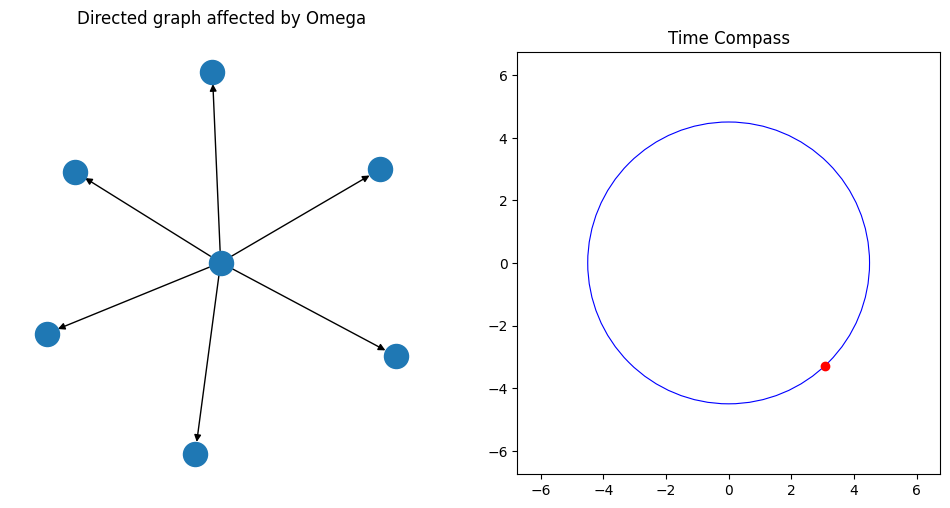

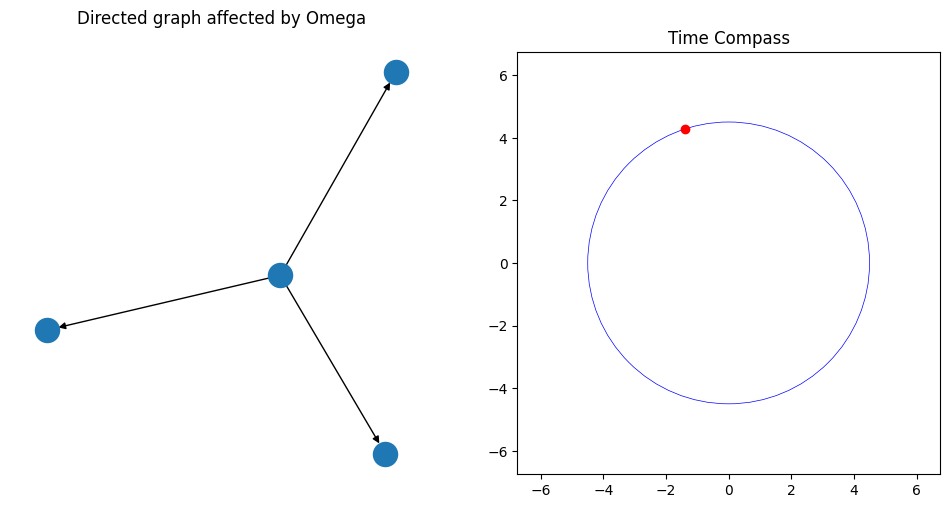

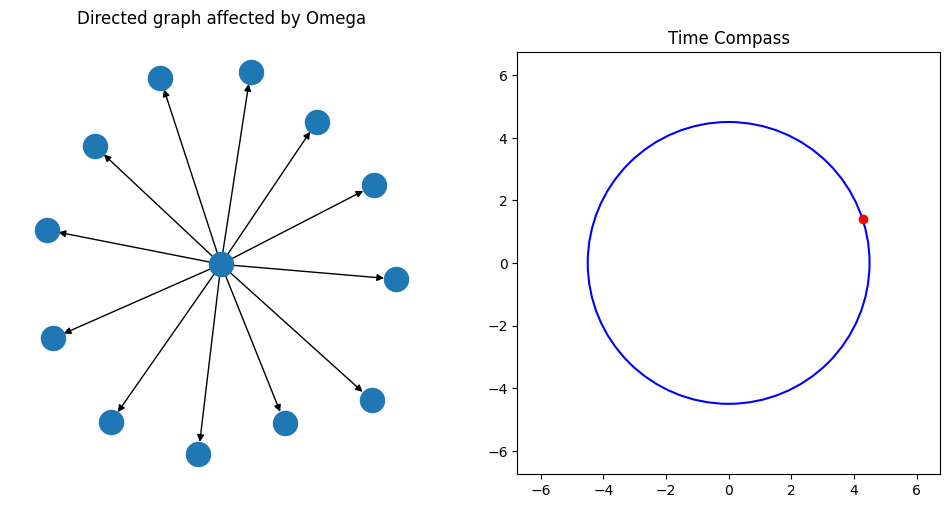

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sympy as sp
import networkx as nx

# Slider widgets for controlling parameters
t_slider = widgets.FloatSlider(value=0, min=0, max=10, step=0.1, description="Time (s)")
R_slider = widgets.FloatSlider(value=5, min=1, max=10, step=0.5, description="Radius (m)")
omega_slider = widgets.FloatSlider(value=2*np.pi, min=0, max=4*np.pi, step=0.1*np.pi, description="Ang. Vel. (rad/s)")

# Function that returns a new graph based on a given omega value
def create_graph(omega_value):
    # Here you can define the logic of how omega affects the graph structure
    # For demonstration, let's generate a radial layout with a number of nodes related to the omega value
    G = nx.DiGraph()
    num_nodes = int(4 + np.abs(np.sin(omega_value)) * 10)
    for i in range(num_nodes):
        G.add_node(i)
        if i != 0:
            G.add_edge(0, i)
    return G

# Define the tessellation pattern and time compass function
def update_visualization(t, R, omega):
    # Clear any previous output
    clear_output(wait=True)

    # Create a new directed graph based on omega
    G = create_graph(omega)

    # Begin plotting side-by-side subplots
    fig, (ax_tess, ax_compass) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the time compass on the left subplot with dynamic outer ring thickness
    circle = plt.Circle((0, 0), R, color='blue', fill=False, linewidth=np.abs(np.sin(omega)) + 0.5)
    ax_compass.add_artist(circle)
    x_compass = R * np.cos(omega * t)
    y_compass = R * np.sin(omega * t)
    ax_compass.plot(x_compass, y_compass, 'ro')  # Plot the moving point on the circle
    ax_compass.set_aspect('equal')
    ax_compass.set_xlim(-R * 1.5, R * 1.5)
    ax_compass.set_ylim(-R * 1.5, R * 1.5)
    ax_compass.set_title("Time Compass")

    # Plot the tessellation graph on the right subplot based on the omega-dependent graph
    pos = nx.spring_layout(G, iterations=50)
    nx.draw(G, pos=pos, ax=ax_tess)
    ax_tess.set_title("Directed graph affected by Omega")
    ax_tess.axis('off')

    # Update and display the figure
    display(fig)

# Interactive widgets to link parameters with the visualization
widgets.interactive(update_visualization, t=t_slider, R=R_slider, omega=omega_slider)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define parameters
domain = (-5, 5, -5, 5)
hex_size = 0.75

# Generate hexagon centers
hex_centers = [(i, j) for i in np.arange(domain[0], domain[1], hex_size * 3/2)
                        for j in np.arange(domain[2], domain[3], hex_size * np.sqrt(3))
                        if (i // (hex_size * 3/2)) % 2 == 0 or j % (hex_size * np.sqrt(3)) == 0]

# Function to plot the tessellation for a given time step
def draw_tessellation(t):
    fig, ax = plt.subplots(figsize=(10, 10))

    # Calculate a dynamic color value for each hexagon based on the current time step
    color_values = [np.sin(t + x) * np.cos(t + y) + 1 for x, y in hex_centers]

    # Normalize color values to be between 0-1
    color_min, color_max = min(color_values), max(color_values)
    color_values_normalized = [(value - color_min) / (color_max - color_min) for value in color_values]

    # Render each hexagon with the calculated color value
    for idx, center in enumerate(hex_centers):
        hexagon = patches.RegularPolygon(center, numVertices=6, radius=hex_size, orientation=np.pi/6)
        hexagon.set_facecolor(plt.cm.viridis(color_values_normalized[idx]))
        ax.add_patch(hexagon)

    # Set plot limits and aspect
    ax.set_xlim(domain[0], domain[1])
    ax.set_ylim(domain[2], domain[3])
    ax.set_aspect('equal')
    ax.axis('off')

    # Display the plot
    plt.show()

# Interactive control to animate the tessellation
from ipywidgets import interact
@interact(t=(0, 10, 0.1))
def animate_tessellation(t=0.1):
    draw_tessellation(t)

interactive(children=(FloatSlider(value=0.1, description='t', max=10.0), Output()), _dom_classes=('widget-inte…

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display

# Define a function to draw dynamic 3D shapes
def draw_shape(ax, Omega, Delta, gamma, H):
    ax.clear()  # Clear previous plot if necessary

    # Create a meshgrid from the u and v parameters
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    u, v = np.meshgrid(u, v)  # This creates a 2D grid from the 1D arrays

    # Calculate the X, Y, Z coordinates for the shape
    x = (1 + Omega * np.cos(v)) * np.cos(u)
    y = (1 + Delta * np.cos(v)) * np.sin(u)
    z = gamma * np.sin(v)

    # Plot the surface with color based on H
    ax.plot_surface(x, y, z, color=(H, 0.5, (1-H)), alpha=0.6)

    # Customizations for visualization
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_zlim([-3, 3])
    ax.set_title('Quasi-Quanta Hyperbolic Distance Visualization')

# Create an interactive visualization using ipywidgets to control the parameters
@widgets.interact(Omega=(0.1, 2.0, 0.1), Delta=(0.1, 2.0, 0.1), gamma=(0.1, 2.0, 0.1), H=(0, 1, 0.05))
def update(Omega=1.0, Delta=1.0, gamma=1.0, H=0.5):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    draw_shape(ax, Omega, Delta, gamma, H)
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='Omega', max=2.0, min=0.1), FloatSlider(value=1.0, de…